In [2]:
%pylab inline
import pandas as pd
pd.set_option('display.precision', 5)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# 動特性の２乗和分解
def dynamicProp(M,A, calcSN=False, calcS=False, calcB=False, calcStandardSN=False):
    # Degree of Freedom
    Ft = len(A.index)*len(A.columns)
    Fb = 1
    Fnb = len(A.index) - 1
    Fe = Ft - Fb - Fnb
    Fn = Fnb + Fe
    # Squared Sum
    St = (A*A).sum().sum() #eq(4.7)
    L = np.asarray(A).dot(M) # A[3,3]とM[3,1]の行列積[3,1]
    r = (M*M).sum()
    Sb = (L.sum())**2/len(A.index)/r #eq(4.8)
    Snb = (L*L).sum()/r - Sb #eq(4.9)
    Se = St - Sb - Snb
    Sn = Snb + Se
    # Variance
    Vb = Sb/Fb
    Vnb = Snb/Fnb
    Ve = Se/Fe
    Vn = Sn/Fn
    
    # calcSNratio[db]
    if calcSN==True:
        eta = (1./len(A.index)/r*(Sb-Ve))/Vn #eq(4.15)
        return 10*np.log10(eta)
    
    # calc Standard SN ratio[db]
    if calcStandardSN==True:
        eta = (Sb-Ve)/Vn #eq(7.8)
        return 10*np.log10(eta)
    
    # calcS[db]
    if calcS==True:
        S = (1./len(A.index)/r*(Sb-Ve))
        return 10*np.log10(S)
    
    # calcB
    if calcB==True:
        beta = L.mean()/r
        return beta
    
    # PrintTable
    data = {'F': [Fb,Fnb,Fe,Fn,Ft], 'S':[Sb,Snb,Se,Sn,St], 'V':[Vb,Vnb,Ve,Vn,nan]}
    df = pd.DataFrame(data=data, index=["b","N*b","e","(N)","T"])
    print df

## 2ヶ月目 - 問2
>ワイヤーボンダーの2つの操作条件$A_1（現行）, A_2（新）$について、ループ高さ安定性を比較するため、信号因子としてループ高さを調整するための調整目盛りMを3水準
$$M_1=-15, M_2=-10, M_3=-5$$
誤差因子はワーヤーの長さ
$$N_1=長い, N_2=標準, N_3=短い$$
として、ループ高さ（$\mu{m}$）を測定した。以下にデータを示す。

A1
       M1     M2     M3
N1  128.7  136.9  154.6
N2  123.6  136.4  148.7
N3  100.2  119.7  149.1

A2
       M1     M2     M3
N1  113.8  129.6  142.4
N2  102.0  120.9  139.3
N3   96.6  111.3  135.3


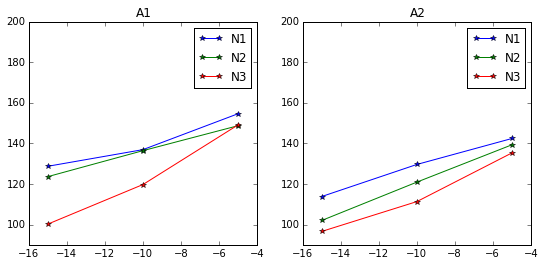

In [4]:
MnoFix = np.asarray([-15, -10, -5])
A1noFix = pd.DataFrame([[128.7,136.9,154.6],
                  [123.6,136.4,148.7],
                  [100.2,119.7,149.1]],
                 index=["N1","N2","N3"],
                 columns=["M1","M2","M3"])
A2noFix = pd.DataFrame([[113.8,129.6,142.4],
                  [102.0,120.9,139.3],
                  [96.6,111.3,135.3]],
                 index=["N1","N2","N3"],
                 columns=["M1","M2","M3"])
print "A1\n",A1noFix
print "\nA2\n",A2noFix

fig = figure(figsize=(9,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(MnoFix,A1noFix.T,'*-')
ax2.plot(MnoFix,A2noFix.T,'*-')
ax1.set_title("A1")
ax2.set_title("A2")
ax1.legend(["N1","N2","N3"])
ax2.legend(["N1","N2","N3"])
ax1.set_ylim(90,200)
ax2.set_ylim(90,200)
plt.show()

###1) $A_1, A_2$の優劣を評価するためには、どのようなSN比がよいかを検討せよ。

明らかにM=0でy=0ではないため、基準点比例式を適用する。<br>
基準点は、とくにどれかに決める根拠が無かったので、中心値のM2を基準にした。<br>
（天下り的には、問(3)で目標値120$\mu{m}$という記述があるので、そのあたりが良さそうか？）<br>
補正データーは以下の通り。

In [5]:
M = MnoFix-MnoFix[1]
A1 = A1noFix-A1noFix["M2"].mean()
A2 = A2noFix-A2noFix["M2"].mean()

print "M\n", M
print "\nA1\n",A1
print "\nA2\n",A2

M
[-5  0  5]

A1
      M1    M2    M3
N1  -2.3   5.9  23.6
N2  -7.4   5.4  17.7
N3 -30.8 -11.3  18.1

A2
      M1   M2    M3
N1  -6.8  9.0  21.8
N2 -18.6  0.3  18.7
N3 -24.0 -9.3  14.7


In [6]:
print "A1の2乗和分解表"
dynamicProp(M,A1)    

A1の2乗和分解表
     F         S          V
b    1  1663.335  1663.3350
N*b  2   182.680    91.3400
e    6   552.195    92.0325
(N)  8   734.875    91.8594
T    9  2398.210        NaN


In [7]:
print "A2の2乗和分解表"
dynamicProp(M,A2)

A2の2乗和分解表
     F          S          V
b    1  1823.5267  1823.5267
N*b  2    29.9433    14.9717
e    6   323.3300    53.8883
(N)  8   353.2733    44.1592
T    9  2176.8000        NaN


SN比は次の式で求める。
$$ \eta = 10log\frac{\frac{1}{nr}(S_\beta - V_e)}{V_N} [dB]$$

In [8]:
print "A1のSN比は、%.2f(db)"%dynamicProp(M,A1, calcSN=True)
print "A2のSN比は、%.2f(db)"%dynamicProp(M,A2, calcSN=True)

A1のSN比は、-9.43(db)
A2のSN比は、-5.73(db)


感度Sは次の式で求める。
$$ S = 10log{\frac{1}{nr}(S_\beta - V_e)}[dB]$$

In [9]:
print "A1の感度Sは、%.2f(db)"%dynamicProp(M,A1, calcS=True)
print "A2の感度Sは、%.2f(db)"%dynamicProp(M,A2, calcS=True)

A1の感度Sは、10.20(db)
A2の感度Sは、10.72(db)


比例係数$\beta$は次の式で求める。
$$ \beta = average(\beta_i) = average(\frac{L_i}{r}) $$

In [10]:
print "A1の比例係数¥betaは、%.2f"%dynamicProp(M,A1, calcB=True)
print "A2の比例係数¥betaは、%.2f"%dynamicProp(M,A2, calcB=True)

A1の比例係数¥betaは、3.33
A2の比例係数¥betaは、3.49


###2) ある製品のループ高さの目標値は120$\mu{m}$である。よい方の操作条件では、高さ調整目盛りはいくらにすればよいか。ただし、調整目盛りの間隔は1である。

SN比より、いい方の条件は$A_2$である。<br>
このときの、比例式は、

In [11]:
print "y-%.1f = %.1f(M-(%.1f))"%(A2noFix["M2"].mean(),dynamicProp(M,A2, calcB=True),MnoFix[1])

y-120.6 = 3.5(M-(-10.0))


調整目盛りMの間隔が１であるとすると、yの目標値120に最も近づくのはM=-10。<br>
したがって高さ調整目盛りは-10とすればよい。

In [12]:
%load_ext version_information
%version_information numpy, matplotlib, pandas, ipython, version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
IPython 4.0.0
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.10.0.dev+a02f5c8
matplotlib 1.4.2
pandas 0.16.0
ipython 4.0.0
version_information 1.0.3
Wed Aug 12 18:30:26 2015 JST